# March 2022 - KMeans Clustering

## 1. Import Data and Libraries
## 2. Create Subset with only numerical data
## 3. Clean Data
## 4. Elbow Technique
## 5. K-Means Clustering
## 6. Check Clustering Stats
## 7. Final Observations

### 1. Import Data and Libraries

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Display graphs without having to call

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 19)

In [6]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,supervisor_status,full_time,work_status,date,salary,years_of_service,occupation_family,agency,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,192500.0,18.8,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,187000.0,29.2,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,161786.0,12.5,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,158383.0,10.5,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,121065.0,13.4,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA


### 2. Create Subset with only numerical data

In [7]:
columns = ['pay_grade','years_of_service','salary','stem']

In [8]:
#Create subset

sub = df[columns]

In [9]:
sub.head()

,pay_grade,years_of_service,salary,stem
0,NaN,18.8,192500.0,0
1,NaN,29.2,187000.0,0
2,15.0,12.5,161786.0,0
3,15.0,10.5,158383.0,0
4,13.0,13.4,121065.0,0


In [10]:
sub.shape

(2152679, 4)

### 3. Clean Data

In [11]:
# Check for missing values

sub.isnull().sum()

pay_grade           631944
years_of_service         0
salary              301029
stem                     0
dtype: int64

In [12]:
#Fix pay_grade NaN

In [13]:
paygrade_nan = sub[sub['pay_grade'].isnull() == True]

In [14]:
paygrade_nan

,pay_grade,years_of_service,salary,stem
0,NaN,18.8,192500.0,0
1,NaN,29.2,187000.0,0
6,NaN,12.4,199300.0,0
16,NaN,36.7,203252.0,0
26,NaN,1.8,104350.0,0
...,...,...,...,...
2155619,NaN,3.2,77780.0,0
2155620,NaN,0.6,42288.0,0
2155621,NaN,4.5,56661.0,0
2155622,NaN,0.3,55631.0,0


In [15]:
sub.pay_grade.mean()

10.60831440060234

In [16]:
sub.pay_grade.median()

12.0

In [17]:
sub.pay_grade.mode()

0    12.0
Name: pay_grade, dtype: float64

In [18]:
#replace pay_grade NaN values with median
sub['pay_grade'] = sub['pay_grade'].fillna(sub['pay_grade'].median())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_4991/1276879238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pay_grade'] = sub['pay_grade'].fillna(sub['pay_grade'].median())


In [19]:
sub.isnull().sum()

pay_grade                0
years_of_service         0
salary              301029
stem                     0
dtype: int64

In [20]:
# Fix salary NaN

In [21]:
salary_nan = sub[sub['salary'].isnull() == True]

In [22]:
salary_nan

,pay_grade,years_of_service,salary,stem
93,14.0,15.3,NaN,0
97,15.0,13.2,NaN,0
100,13.0,13.4,NaN,0
101,14.0,12.6,NaN,0
102,13.0,17.4,NaN,0
...,...,...,...,...
2155580,12.0,1.0,NaN,0
2155586,12.0,2.1,NaN,0
2155587,12.0,1.8,NaN,0
2155588,12.0,1.8,NaN,0


In [23]:
sub.salary.mean()

95563.19367267033

In [24]:
sub.salary.mode()

0    176300.0
Name: salary, dtype: float64

In [25]:
sub.salary.median()

87301.0

In [26]:
#replace pay_grade NaN values with median
sub['salary'] = sub['salary'].fillna(sub['salary'].mean())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_4991/4293097397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['salary'] = sub['salary'].fillna(sub['salary'].mean())


In [27]:
sub.isnull().sum()

pay_grade           0
years_of_service    0
salary              0
stem                0
dtype: int64

### Standardize Data

In [28]:
scaler = StandardScaler()

In [32]:
df2 = pd.DataFrame(scaler.fit_transform(sub), columns = columns)
df2.head()

,pay_grade,years_of_service,salary,stem
0,0.380626,0.660743,2.258228,-0.593642
1,0.380626,1.704480,2.130100,-0.593642
2,1.542086,0.028479,1.542718,-0.593642
3,1.542086,-0.172240,1.463442,-0.593642
4,0.767779,0.118802,0.594087,-0.593642


### 4. Elbow Technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8610715.999999592,
 -6034672.574655823,
 -4180780.3031258383,
 -3315323.886863008,
 -2772926.157431375,
 -2425340.560171146,
 -2104960.4050745503,
 -1883321.9698055186,
 -1665939.7705983915]

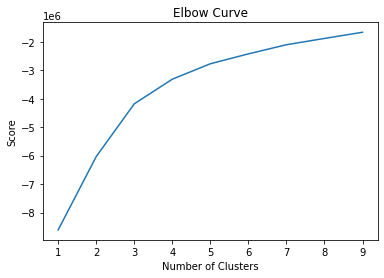

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  After standardizing the data and doing the elbow technique to find the curve, we can conclude that we should create 5 clusters.  We could go with 4 as well, as 4-5 isn't a sharp curve but it seems to flatten out more to. me at 5 so I'll go with 5 clusters.

### 5. K-Means Clustering

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [37]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=5)

In [38]:
df2['clusters'] = kmeans.fit_predict(df2)

In [39]:
df2.head()

,pay_grade,years_of_service,salary,stem,clusters
0,0.380626,0.660743,2.258228,-0.593642,0
1,0.380626,1.704480,2.130100,-0.593642,0
2,1.542086,0.028479,1.542718,-0.593642,0
3,1.542086,-0.172240,1.463442,-0.593642,0
4,0.767779,0.118802,0.594087,-0.593642,1


In [40]:
df2['clusters'].value_counts()

1    722269
3    461088
0    426989
4    365120
2    177213
Name: clusters, dtype: int64

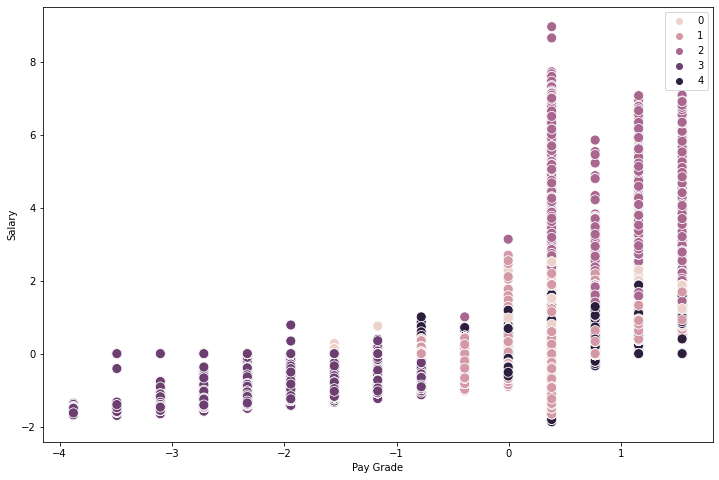

In [41]:
# Plot the clusters for the "Pay Grade" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['pay_grade'], y=df2['salary'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pay Grade') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

## This visual compares Pay Grade and Salary.  As we know these two items correlate so you would expect to see more categories that are one color on one end and one on the other for groupings.  I do see where the other categories come in for the cream, black and pink colors where the salaries go from top to bottom range but the pay grade was higher.  So this shows where those two variables aren't connecting as well (which we also knew)

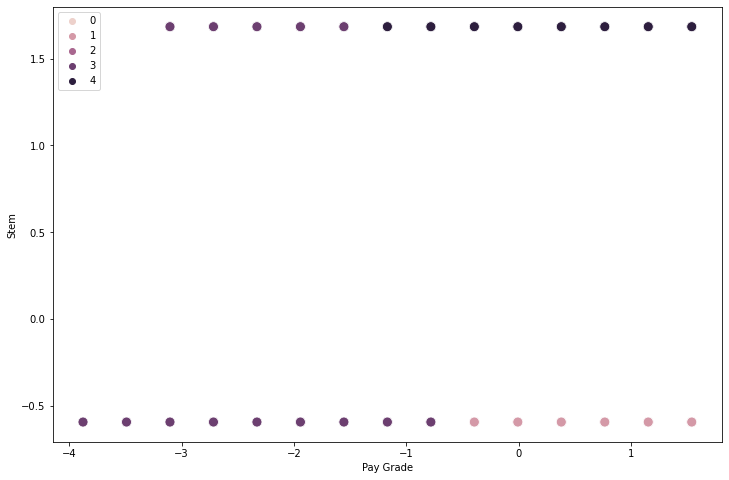

In [42]:
# Plot the clusters for the "Stem" and "Pay Grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['pay_grade'], y=df2['stem'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pay Grade') # Label x-axis.
plt.ylabel('Stem') # Label y-axis.
plt.show()

## This visual shows stem and pay grade comparison.  I wanted to see what it would do with the stem category since it only has two values.  You can see out of the 5 categories we only really see 3.  But with less Stem options it was able to categorize the pay grades better, basically dividing each stem into 2 categories for pay grade (higher grades and lower grades)

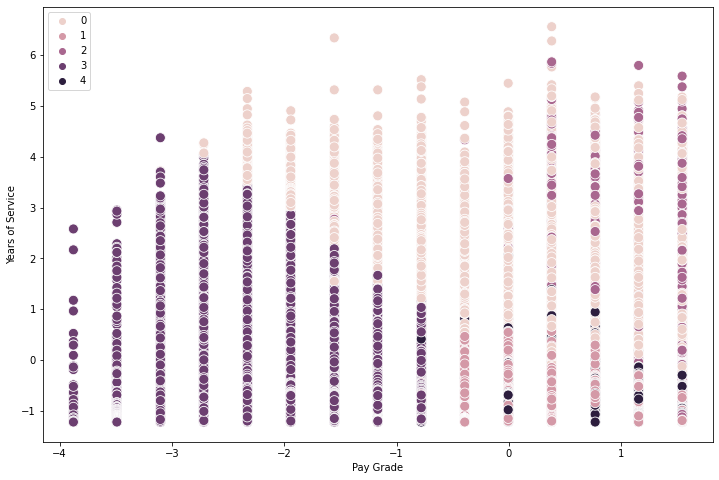

In [43]:
# Plot the clusters for the "Years of Service" and "Pay Grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['pay_grade'], y=df2['years_of_service'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pay Grade') # Label x-axis.
plt.ylabel('Years of Service') # Label y-axis.
plt.show()

## This last visual compares pay grade and years of service.  You would hope that the longer you work the more your pay increases, but due to the variety of professions that may make more coming in new, you can see that assumption isn't true. You see a lot of the purple in the low pay grade range and a lot of the cream in the middle with higher years of service.  the higher pay grades really seem to be a hodge podge of colors making it hard to understand, but as we know these two variables only correlate a tiny bit, I think it would be hard to categorize them.

### 6. Check Clustering Stats

In [44]:
df2.loc[df2['clusters'] == 4, 'cluster'] = 'black'
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'cream'

In [45]:
df2.groupby('cluster').agg({'pay_grade':['mean', 'median'], 
                         'stem':['mean', 'median'], 
                         'salary':['mean', 'median'],
                          'years_of_service':['mean', 'median']})

pay_grade                stem              salary            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
black        0.367319  0.380626  1.684516  1.684516  0.091002  0.011713   
cream        0.540087  0.380626 -0.591482 -0.593642  0.485075  0.216880   
dark purple -1.664857 -1.555141 -0.481639 -0.593642 -0.936340 -0.999211   
pink         0.382127  0.380626 -0.593642 -0.593642 -0.177105 -0.069356   
purple       0.716199  0.380626  1.627155  1.684516  1.801810  1.440869   

            years_of_service            
                        mean    median  
cluster                                 
black              -0.440071 -0.573677  
cream               1.218301  1.012000  
dark purple        -0.421603 -0.694109  
pink               -0.445238 -0.503426  
purple              0.882865  0.821318

### 7. Final Observations

## Seeing the final breakdown of each category does make it hard for me to understand as I had to scale the data.  I can't see the median salary amount in each category as it was scaled.  You can still see the comparison of each category though. The numbers are fairly all over the place.  None of them have a clear "highest value of each category" same with none of them have the lowest.  I believe this is since the variables have so much data and they have such a variance from top to bottom in all the categories you don't see a very clear way to cluster the data.  This is expected with the data.  This strategy is definitely better set for something like sales and things where you can find similar traits.  All the things I have run on my data so far has not shown any sort of similar traits between any of my categories so I would have been surprised to find much here.